In [118]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
from streamlit_shap import st_shap
import pickle
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train du modèle pour Dashboard

In [2]:
features_importance =  ['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH', 'PAYMENT_RATE', 'EXT_SOURCE_3', 'CREDIT_TO_ANNUITY_RATIO',
                        'EXT_SOURCES_MEAN', 'AMT_ANNUITY', 'CREDIT_TO_GOODS_RATIO', 
                        'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN', 'EXT_SOURCE_1', 'APPROVED_CNT_PAYMENT_MEAN',
                        'EXT_SOURCES_MIN', 'INS_AMT_PAYMENT_SUM', 'CODE_GENDER', 'AMT_GOODS_PRICE',
                        'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'ANNUITY_INCOME_PERC', 'DAYS_REGISTRATION',
                        'DAYS_EMPLOYED_PERC', 'DAYS_EMPLOYED']

In [4]:
data_train = pd.read_csv('C:\\Users\\LeMuon\\Downloads\\P7_Dataset_train_Imputed_std.csv', sep=",")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307506 entries, 0 to 307505
Columns: 841 entries, SK_ID_CURR to CC_COUNT
dtypes: float64(840), int64(1)
memory usage: 1.9 GB


In [6]:
data_train = data_train[features_importance]

# Enregistrement le dataset après le fusionnement de tous les fichiers
data_train.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_train_20features_importance.csv', index=False)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307506 entries, 0 to 307505
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SK_ID_CURR                         307506 non-null  int64  
 1   TARGET                             307506 non-null  float64
 2   DAYS_BIRTH                         307506 non-null  float64
 3   PAYMENT_RATE                       307506 non-null  float64
 4   EXT_SOURCE_3                       307506 non-null  float64
 5   CREDIT_TO_ANNUITY_RATIO            307506 non-null  float64
 6   EXT_SOURCES_MEAN                   307506 non-null  float64
 7   AMT_ANNUITY                        307506 non-null  float64
 8   CREDIT_TO_GOODS_RATIO              307506 non-null  float64
 9   BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN  307506 non-null  float64
 10  EXT_SOURCE_1                       307506 non-null  float64
 11  APPROVED_CNT_PAYMENT_MEAN          3075

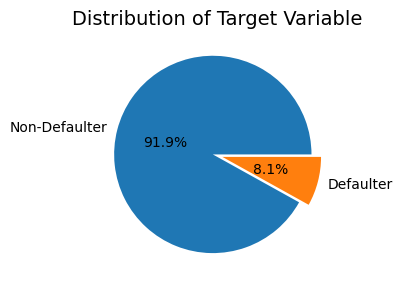

In [14]:
labels = ['Non-Defaulter', 'Defaulter']

pie, ax = plt.subplots(figsize=[5,3])
plt.pie(x=data_train['TARGET'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Distribution of Target Variable", fontsize=14);

In [6]:
y = data_train['TARGET']
data1 = data_train.copy(deep = True)
data1.drop(['TARGET', 'SK_ID_CURR'], axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(data1,
                                                    data_train['TARGET'],
                                                    train_size=0.8, 
                                                    stratify=y,
                                                    random_state=42)

model_LGBM = LGBMClassifier(random_state=42, n_jobs=-1, class_weight = 'balanced', learning_rate= 0.01,
                            max_depth=-1, n_estimators=500, num_leaves=31)

model_LGBM.fit(X_train, y_train)
    

LGBMClassifier(class_weight='balanced', learning_rate=0.01, n_estimators=500,
               random_state=42)

In [8]:
# https://medium.com/@maziarizadi/pickle-your-model-in-python-2bbe7dba2bbb
# Enregister le modèle entrainé sue datacomplete
import pickle

pickle.dump(model_LGBM, open('model_complete.pkl','wb'))

In [9]:
# Loading model to compare the results
#model_complete = pickle.load(open('model_complete.pkl','rb'))

# Création de datasets pour Dashboard

In [20]:
data_test = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7_Dataset_test.csv', sep=",")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 840 entries, SK_ID_CURR to CC_COUNT
dtypes: float64(692), int64(148)
memory usage: 312.4 MB


In [21]:
features_importance_without_Target =  ['SK_ID_CURR', 'DAYS_BIRTH', 'PAYMENT_RATE', 'EXT_SOURCE_3', 
                                       'CREDIT_TO_ANNUITY_RATIO', 'EXT_SOURCES_MEAN', 'AMT_ANNUITY', 
                                       'CREDIT_TO_GOODS_RATIO', 'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN', 'EXT_SOURCE_1', 
                                       'APPROVED_CNT_PAYMENT_MEAN', 'EXT_SOURCES_MIN', 'INS_AMT_PAYMENT_SUM', 
                                       'CODE_GENDER', 'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 
                                       'ANNUITY_INCOME_PERC', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED_PERC', 'DAYS_EMPLOYED']
data_test = data_test[features_importance_without_Target]

# Enregistrement le dataset après le fusionnement de tous les fichiers
data_test.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance.csv', index=False)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         48744 non-null  int64  
 1   DAYS_BIRTH                         48744 non-null  int64  
 2   PAYMENT_RATE                       48720 non-null  float64
 3   EXT_SOURCE_3                       40076 non-null  float64
 4   CREDIT_TO_ANNUITY_RATIO            48720 non-null  float64
 5   EXT_SOURCES_MEAN                   48737 non-null  float64
 6   AMT_ANNUITY                        48720 non-null  float64
 7   CREDIT_TO_GOODS_RATIO              48744 non-null  float64
 8   BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN  32773 non-null  float64
 9   EXT_SOURCE_1                       28212 non-null  float64
 10  APPROVED_CNT_PAYMENT_MEAN          47633 non-null  float64
 11  EXT_SOURCES_MIN                    48737 non-null  flo

In [22]:
# Création des tableaux interprétables
data_test_interprete = data_test.copy()
data_test_interprete.rename(columns={'DAYS_BIRTH': 'Age',
                                     'PAYMENT_RATE' : 'Taux de paiement',
                                     'CREDIT_TO_ANNUITY_RATIO': 'Ratio de remboursement',
                                     'AMT_ANNUITY': 'Annuités',
                                     'CREDIT_TO_GOODS_RATIO' : 'Ration de crédit de bien',
                                     #'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN' : '' ,
                                     #'APPROVED_CNT_PAYMENT_MEAN' : '',
                                     #'INS_AMT_PAYMENT_SUM' : '',
                                     'CODE_GENDER': 'Genre (H/F)',
                                     'AMT_GOODS_PRICE' : 'Prix du bien',
                                     'DAYS_ID_PUBLISH' : 'Date de création de dossier',
                                     'DAYS_REGISTRATION' : 'Date enregistrement', 
                                     'ANNUITY_INCOME_PERC' : 'Pourcentage de revevue',    
                                     'DAYS_EMPLOYED_PERC' : 'Pourcentage de jours travaillés',
                                     'DAYS_EMPLOYED': 'Jours de travail'
                                     }, inplace=True)

data_test_interprete['Genre (H/F)'] = np.where((data_test_interprete['Genre (H/F)'] == 1), 'F', 'M')
data_test_interprete['Taux de paiement'] = round(data_test_interprete['Taux de paiement']*100, 1)
data_test_interprete['Age'] = round(data_test_interprete['Age'] / -365).astype('int')
data_test_interprete['Pourcentage de revevue'] = round(data_test_interprete['Pourcentage de revevue']*100, 1)
data_test_interprete['Pourcentage de jours travaillés'] = round(data_test_interprete['Pourcentage de jours travaillés']*100,1)
data_test_interprete['Ratio de remboursement'] = round(data_test_interprete['Ratio de remboursement'], 2)
data_test_interprete['Ration de crédit de bien'] = round(data_test_interprete['Ration de crédit de bien'], 2)

display(data_test_interprete)

,SK_ID_CURR,Age,Taux de paiement,EXT_SOURCE_3,Ratio de remboursement,EXT_SOURCES_MEAN,Annuités,Ration de crédit de bien,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,Genre (H/F),Prix du bien,Date de création de dossier,EXT_SOURCE_2,Pourcentage de revevue,Date enregistrement,Pourcentage de jours travaillés,Jours de travail
0,100001,53,3.6,0.159520,27.66,0.567263,20560.5,1.26,1.012756,0.752614,...,0.159520,41195.925,F,450000.0,-812,0.789654,15.2,-5170.0,12.1,-2329.0
1,100005,49,7.8,0.432962,12.82,0.429869,17370.0,1.24,1.047346,0.564990,...,0.291656,56161.845,M,180000.0,-1623,0.291656,17.5,-9118.0,24.7,-4469.0
2,100013,55,10.5,0.610991,9.51,0.655389,69777.0,1.05,NaN,NaN,...,0.610991,1509736.545,M,630000.0,-3503,0.699787,34.5,-2175.0,22.2,-4458.0
3,100028,38,3.1,0.612704,32.13,0.549372,49018.5,1.00,1.191931,0.525734,...,0.509677,492310.665,F,1575000.0,-4208,0.509677,15.6,-2000.0,13.4,-1866.0
4,100038,36,5.1,NaN,19.51,0.313916,32067.0,1.00,NaN,0.202145,...,0.202145,133204.050,M,625500.0,-4262,0.425687,17.8,-4000.0,16.8,-2191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,55,4.2,0.643026,23.61,0.645800,17473.5,1.53,1.254429,NaN,...,0.643026,273109.365,F,270000.0,-3399,0.648575,14.4,-9094.0,25.9,-5169.0
48740,456222,31,5.1,NaN,19.51,0.684596,31909.5,1.26,NaN,NaN,...,0.684596,567315.675,F,495000.0,-3003,0.684596,20.3,-3015.0,10.3,-1149.0
48741,456223,44,10.5,0.283712,9.49,0.549995,33205.5,1.00,2.368307,0.733503,...,0.283712,185271.930,F,315000.0,-1504,0.632770,16.4,-2681.0,19.1,-3037.0
48742,456224,38,5.6,0.595456,17.91,0.471416,25128.0,1.00,1.279227,0.373090,...,0.373090,500807.790,M,450000.0,-1364,0.445701,11.2,-1461.0,19.6,-2731.0


In [23]:
data_test_interprete.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_interprete.csv', index=False)

In [25]:
data_index = data_test['SK_ID_CURR']
data_test.drop(columns=['SK_ID_CURR'], inplace = True)

In [26]:
from sklearn.impute import KNNImputer, SimpleImputer

# Imputation des valeurs NaN par la médiane
data_test.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy = 'median')
data_test_Imputed = imputer.fit_transform(data_test)
data_test_Imputed = pd.DataFrame(data_test_Imputed, columns=data_test.columns)

In [27]:
# Standardisation des données 
from sklearn.preprocessing import MinMaxScaler

# Fonction pour standardisation des données du dataset
def std_dataset(df_in, method_std):
    df_in_std = pd.DataFrame(method_std.fit_transform(df_in), columns = df_in.columns)
    
    return df_in_std

scaler = MinMaxScaler()
data_test_Imputed_std = std_dataset(data_test_Imputed, scaler)

In [44]:
# Remettre les comonnes ['SK_ID_CURR','TARGET']
data_test_Imp_std = pd.concat([data_index, data_test_Imputed_std], axis=1)
data_test_Imp_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         48744 non-null  int64  
 1   DAYS_BIRTH                         48744 non-null  float64
 2   PAYMENT_RATE                       48744 non-null  float64
 3   EXT_SOURCE_3                       48744 non-null  float64
 4   CREDIT_TO_ANNUITY_RATIO            48744 non-null  float64
 5   EXT_SOURCES_MEAN                   48744 non-null  float64
 6   AMT_ANNUITY                        48744 non-null  float64
 7   CREDIT_TO_GOODS_RATIO              48744 non-null  float64
 8   BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN  48744 non-null  float64
 9   EXT_SOURCE_1                       48744 non-null  float64
 10  APPROVED_CNT_PAYMENT_MEAN          48744 non-null  float64
 11  EXT_SOURCES_MIN                    48744 non-null  flo

In [51]:
data_test_Imp_std

,SK_ID_CURR,DAYS_BIRTH,PAYMENT_RATE,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,EXT_SOURCES_MEAN,AMT_ANNUITY,CREDIT_TO_GOODS_RATIO,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,CODE_GENDER,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,EXT_SOURCE_2,ANNUITY_INCOME_PERC,DAYS_REGISTRATION,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED
0,100001,0.333427,0.054714,0.180263,0.811659,0.663246,0.102453,0.183284,0.000002,0.798495,...,0.186565,0.001260,1.0,0.184049,0.872086,0.923572,0.072596,0.782059,0.167752,0.866682
1,100005,0.399339,0.502570,0.490287,0.198002,0.502447,0.084558,0.175403,0.000002,0.595809,...,0.341111,0.001718,0.0,0.061350,0.744329,0.341111,0.084064,0.615631,0.342983,0.744130
2,100013,0.288794,0.794125,0.692134,0.060738,0.766385,0.378515,0.120239,0.000002,0.532916,...,0.714607,0.046184,0.0,0.265849,0.448173,0.818463,0.167831,0.908313,0.308422,0.744760
3,100028,0.628269,0.000916,0.694076,0.996339,0.642307,0.262078,0.104478,0.000002,0.553401,...,0.596110,0.015060,1.0,0.695297,0.337114,0.596110,0.074237,0.915690,0.185047,0.893197
4,100038,0.680685,0.216601,0.587946,0.474282,0.366741,0.166995,0.104478,0.000002,0.203835,...,0.236420,0.004075,0.0,0.263804,0.328607,0.497875,0.085399,0.831380,0.232902,0.874585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.292602,0.121172,0.728454,0.644014,0.755163,0.085138,0.262090,0.000002,0.532916,...,0.752075,0.008355,1.0,0.102249,0.464556,0.758565,0.068393,0.616643,0.358848,0.704043
48740,456222,0.784510,0.216614,0.587946,0.474263,0.800567,0.166111,0.181313,0.000002,0.532916,...,0.800695,0.017355,1.0,0.204499,0.526938,0.800695,0.097509,0.872903,0.142338,0.934257
48741,456223,0.519292,0.796393,0.321070,0.059948,0.643036,0.173381,0.104478,0.000004,0.777850,...,0.331821,0.005668,1.0,0.122699,0.763075,0.740079,0.078380,0.886983,0.264412,0.826137
48742,456224,0.628717,0.265575,0.674520,0.408212,0.551071,0.128073,0.104478,0.000002,0.388503,...,0.436357,0.015320,0.0,0.184049,0.785129,0.521283,0.052477,0.938412,0.271035,0.843661


In [30]:
data_test_Imp_std.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_std.csv', index=False)

# Création de datasets simples pour tester Dashboard

In [61]:
data_test = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance.csv', sep=",")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         48744 non-null  int64  
 1   DAYS_BIRTH                         48744 non-null  int64  
 2   PAYMENT_RATE                       48720 non-null  float64
 3   EXT_SOURCE_3                       40076 non-null  float64
 4   CREDIT_TO_ANNUITY_RATIO            48720 non-null  float64
 5   EXT_SOURCES_MEAN                   48737 non-null  float64
 6   AMT_ANNUITY                        48720 non-null  float64
 7   CREDIT_TO_GOODS_RATIO              48744 non-null  float64
 8   BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN  32773 non-null  float64
 9   EXT_SOURCE_1                       28212 non-null  float64
 10  APPROVED_CNT_PAYMENT_MEAN          47633 non-null  float64
 11  EXT_SOURCES_MIN                    48737 non-null  flo

In [62]:
data_test_sample = data_test.sample(frac=0.01, random_state=1)
#data_test_sample.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_sample.csv', index=False)
data_test_sample

,SK_ID_CURR,DAYS_BIRTH,PAYMENT_RATE,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,EXT_SOURCES_MEAN,AMT_ANNUITY,CREDIT_TO_GOODS_RATIO,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,CODE_GENDER,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,EXT_SOURCE_2,ANNUITY_INCOME_PERC,DAYS_REGISTRATION,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED
38424,382144,-13461,0.042432,0.584990,23.566954,0.489927,14080.5,1.316804,1.109252,0.421873,...,0.421873,1154900.700,0,252000.0,-4154,0.462917,0.089400,-201.0,0.043236,-582.0
3298,123136,-9675,0.092178,0.135951,10.848527,0.158058,25668.0,1.237600,1.046025,0.215007,...,0.123216,970809.300,1,225000.0,-966,0.123216,0.228160,-2667.0,0.125065,-1210.0
6474,147438,-20645,0.042400,NaN,23.584906,0.285300,15264.0,1.000000,NaN,0.542658,...,0.027943,669686.490,1,360000.0,-3308,0.027943,0.185355,-2696.0,NaN,NaN
28971,311128,-24267,0.075287,NaN,13.282508,0.084055,18445.5,1.158404,NaN,NaN,...,0.084055,2492817.210,1,211500.0,-4254,0.084055,0.091089,-16375.0,NaN,NaN
33424,343918,-12646,0.077518,0.832785,12.900186,0.767276,77364.0,1.108900,NaN,NaN,...,0.701768,230721.705,0,900000.0,-4368,0.701768,0.286533,-6699.0,0.234620,-2967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35872,362450,-16257,0.051060,0.567379,19.584802,0.577441,45954.0,1.000000,NaN,0.581267,...,0.567379,87185.115,1,900000.0,-4873,0.583676,0.116045,-4715.0,0.014701,-239.0
22083,260469,-12659,0.098906,0.441836,10.110583,0.403575,47326.5,1.052802,1.005093,0.492282,...,0.276607,96020.010,1,454500.0,-729,0.276607,0.161800,-724.0,0.025357,-321.0
6052,144354,-10509,0.034839,0.700184,28.703689,0.664570,56965.5,1.211200,inf,0.539458,...,0.539458,217816.875,0,1350000.0,-1225,0.754070,0.120562,-10393.0,0.144257,-1516.0
46210,437795,-17073,0.037867,0.754406,26.408348,0.488661,28894.5,1.211200,NaN,0.338244,...,0.338244,77660.820,0,630000.0,-566,0.373332,0.256840,-10469.0,0.309202,-5279.0


In [69]:
data_test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 38424 to 34935
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         487 non-null    int64  
 1   DAYS_BIRTH                         487 non-null    int64  
 2   PAYMENT_RATE                       487 non-null    float64
 3   EXT_SOURCE_3                       406 non-null    float64
 4   CREDIT_TO_ANNUITY_RATIO            487 non-null    float64
 5   EXT_SOURCES_MEAN                   487 non-null    float64
 6   AMT_ANNUITY                        487 non-null    float64
 7   CREDIT_TO_GOODS_RATIO              487 non-null    float64
 8   BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN  321 non-null    float64
 9   EXT_SOURCE_1                       282 non-null    float64
 10  APPROVED_CNT_PAYMENT_MEAN          472 non-null    float64
 11  EXT_SOURCES_MIN                    487 non-null    f

In [63]:
data_test_interprete_sample = data_test_sample.copy()
data_test_interprete_sample.rename(columns={'DAYS_BIRTH': 'Age',
                                     'PAYMENT_RATE' : 'Taux de paiement',
                                     'CREDIT_TO_ANNUITY_RATIO': 'Ratio de remboursement',
                                     'AMT_ANNUITY': 'Annuités',
                                     'CREDIT_TO_GOODS_RATIO' : 'Ration de crédit de bien',
                                     #'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN' : '' ,
                                     #'APPROVED_CNT_PAYMENT_MEAN' : '',
                                     #'INS_AMT_PAYMENT_SUM' : '',
                                     'CODE_GENDER': 'Genre (H/F)',
                                     'AMT_GOODS_PRICE' : 'Prix du bien',
                                     'DAYS_ID_PUBLISH' : 'Date de création de dossier',
                                     'DAYS_REGISTRATION' : 'Date enregistrement', 
                                     'ANNUITY_INCOME_PERC' : 'Pourcentage de revevue',    
                                     'DAYS_EMPLOYED_PERC' : 'Pourcentage de jours travaillés',
                                     'DAYS_EMPLOYED': 'Jours de travail'
                                     }, inplace=True)

data_test_interprete_sample['Genre (H/F)'] = np.where((data_test_interprete_sample['Genre (H/F)'] == 1), 'F', 'M')
data_test_interprete_sample['Taux de paiement'] = round(data_test_interprete_sample['Taux de paiement']*100, 1)
data_test_interprete_sample['Age'] = round(data_test_interprete_sample['Age'] / -365).astype('int')
data_test_interprete_sample['Pourcentage de revevue'] = round(data_test_interprete_sample['Pourcentage de revevue']*100, 1)
data_test_interprete_sample['Pourcentage de jours travaillés'] = round(data_test_interprete_sample['Pourcentage de jours travaillés']*100,1)
data_test_interprete_sample['Ratio de remboursement'] = round(data_test_interprete_sample['Ratio de remboursement'], 2)
data_test_interprete_sample['Ration de crédit de bien'] = round(data_test_interprete_sample['Ration de crédit de bien'], 2)

display(data_test_interprete_sample)


,SK_ID_CURR,Age,Taux de paiement,EXT_SOURCE_3,Ratio de remboursement,EXT_SOURCES_MEAN,Annuités,Ration de crédit de bien,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,Genre (H/F),Prix du bien,Date de création de dossier,EXT_SOURCE_2,Pourcentage de revevue,Date enregistrement,Pourcentage de jours travaillés,Jours de travail
38424,382144,37,4.2,0.584990,23.57,0.489927,14080.5,1.32,1.109252,0.421873,...,0.421873,1154900.700,M,252000.0,-4154,0.462917,8.9,-201.0,4.3,-582.0
3298,123136,27,9.2,0.135951,10.85,0.158058,25668.0,1.24,1.046025,0.215007,...,0.123216,970809.300,F,225000.0,-966,0.123216,22.8,-2667.0,12.5,-1210.0
6474,147438,57,4.2,NaN,23.58,0.285300,15264.0,1.00,NaN,0.542658,...,0.027943,669686.490,F,360000.0,-3308,0.027943,18.5,-2696.0,NaN,NaN
28971,311128,66,7.5,NaN,13.28,0.084055,18445.5,1.16,NaN,NaN,...,0.084055,2492817.210,F,211500.0,-4254,0.084055,9.1,-16375.0,NaN,NaN
33424,343918,35,7.8,0.832785,12.90,0.767276,77364.0,1.11,NaN,NaN,...,0.701768,230721.705,M,900000.0,-4368,0.701768,28.7,-6699.0,23.5,-2967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35872,362450,45,5.1,0.567379,19.58,0.577441,45954.0,1.00,NaN,0.581267,...,0.567379,87185.115,F,900000.0,-4873,0.583676,11.6,-4715.0,1.5,-239.0
22083,260469,35,9.9,0.441836,10.11,0.403575,47326.5,1.05,1.005093,0.492282,...,0.276607,96020.010,F,454500.0,-729,0.276607,16.2,-724.0,2.5,-321.0
6052,144354,29,3.5,0.700184,28.70,0.664570,56965.5,1.21,inf,0.539458,...,0.539458,217816.875,M,1350000.0,-1225,0.754070,12.1,-10393.0,14.4,-1516.0
46210,437795,47,3.8,0.754406,26.41,0.488661,28894.5,1.21,NaN,0.338244,...,0.338244,77660.820,M,630000.0,-566,0.373332,25.7,-10469.0,30.9,-5279.0


In [64]:
data_test_interprete_sample.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_interprete_sample.csv', index=False)

In [102]:
data_index_sample = data_test_sample[['SK_ID_CURR']]
data_index_sample.reset_index(drop=True, inplace= True)
data_index_sample

,SK_ID_CURR
0,382144
1,123136
2,147438
3,311128
4,343918
...,...
482,362450
483,260469
484,144354
485,437795


In [103]:
#data_index_sample = data_test_sample[['SK_ID_CURR']]
data_test_sample1 = data_test_sample.drop(columns=['SK_ID_CURR'])

# Imputation des valeurs NaN par la médiane
data_test_sample1.replace([np.inf, -np.inf], np.nan, inplace=True)
data_test_Imputed_sample1 = imputer.fit_transform(data_test_sample1)
data_test_Imputed_sample1 = pd.DataFrame(data_test_Imputed_sample1, columns=data_test_sample1.columns)

data_test_Imputed_std_sample1 = std_dataset(data_test_Imputed_sample1, scaler)
data_test_Imputed_std_sample1

,DAYS_BIRTH,PAYMENT_RATE,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,EXT_SOURCES_MEAN,AMT_ANNUITY,CREDIT_TO_GOODS_RATIO,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,APPROVED_CNT_PAYMENT_MEAN,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,CODE_GENDER,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,EXT_SOURCE_2,ANNUITY_INCOME_PERC,DAYS_REGISTRATION,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED
0,0.676451,0.121390,0.653472,0.644060,0.613727,0.054710,0.564712,0.004569,0.428052,0.578947,0.536781,0.200919,0.0,0.117949,0.314851,0.581973,0.106897,0.988329,0.056634,0.963058
1,0.902792,0.654487,0.127847,0.116590,0.194241,0.123331,0.423529,0.004309,0.177871,0.142857,0.154731,0.168481,1.0,0.102564,0.840924,0.152810,0.333969,0.837641,0.177949,0.918443
2,0.246966,0.121044,0.595279,0.644805,0.355077,0.061719,0.000000,0.004523,0.574128,0.221053,0.032855,0.115423,1.0,0.179487,0.454455,0.032447,0.263922,0.835869,0.187782,0.881927
3,0.030430,0.473473,0.595279,0.217534,0.100701,0.080560,0.282361,0.004523,0.518559,0.223392,0.104636,0.436665,1.0,0.094872,0.298350,0.103337,0.109661,0.000000,0.187782,0.881927
4,0.725175,0.497384,0.943531,0.201678,0.964300,0.429474,0.194118,0.004523,0.518559,0.157895,0.894831,0.038075,0.0,0.487179,0.279538,0.883725,0.429494,0.591262,0.340370,0.793620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.509296,0.213848,0.632858,0.478909,0.724346,0.243464,0.000000,0.004523,0.620821,0.122807,0.722918,0.012784,1.0,0.487179,0.196205,0.734534,0.150501,0.712496,0.014330,0.987425
483,0.724398,0.726586,0.485902,0.085985,0.504577,0.251592,0.094121,0.004140,0.513204,0.000000,0.350953,0.014340,1.0,0.233333,0.880033,0.346597,0.225375,0.956370,0.030128,0.981600
484,0.852932,0.040015,0.788313,0.857095,0.834479,0.308674,0.376471,0.004523,0.570257,0.181287,0.687199,0.035802,0.0,0.743590,0.798185,0.949801,0.157892,0.365536,0.206404,0.896704
485,0.460513,0.072465,0.851784,0.761901,0.612127,0.142438,0.376471,0.004523,0.326913,0.000000,0.429801,0.011106,0.0,0.333333,0.906931,0.468795,0.380903,0.360892,0.450942,0.629369


In [104]:
# Remettre les comonnes ['SK_ID_CURR']
#data_test_Imp_std_sample1 = pd.concat([data_index_sample, data_test_Imputed_std_sample1], axis=1)
data_test_Imputed_std_sample1 = pd.concat([data_index_sample, data_test_Imputed_std_sample1], axis=1)
#data_test_Imputed_std_sample1.assign(Profit=6)
#['SK_ID_CURR'] = data_index_sample['SK_ID_CURR']
data_test_Imputed_std_sample1

,SK_ID_CURR,DAYS_BIRTH,PAYMENT_RATE,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,EXT_SOURCES_MEAN,AMT_ANNUITY,CREDIT_TO_GOODS_RATIO,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,CODE_GENDER,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,EXT_SOURCE_2,ANNUITY_INCOME_PERC,DAYS_REGISTRATION,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED
0,382144,0.676451,0.121390,0.653472,0.644060,0.613727,0.054710,0.564712,0.004569,0.428052,...,0.536781,0.200919,0.0,0.117949,0.314851,0.581973,0.106897,0.988329,0.056634,0.963058
1,123136,0.902792,0.654487,0.127847,0.116590,0.194241,0.123331,0.423529,0.004309,0.177871,...,0.154731,0.168481,1.0,0.102564,0.840924,0.152810,0.333969,0.837641,0.177949,0.918443
2,147438,0.246966,0.121044,0.595279,0.644805,0.355077,0.061719,0.000000,0.004523,0.574128,...,0.032855,0.115423,1.0,0.179487,0.454455,0.032447,0.263922,0.835869,0.187782,0.881927
3,311128,0.030430,0.473473,0.595279,0.217534,0.100701,0.080560,0.282361,0.004523,0.518559,...,0.104636,0.436665,1.0,0.094872,0.298350,0.103337,0.109661,0.000000,0.187782,0.881927
4,343918,0.725175,0.497384,0.943531,0.201678,0.964300,0.429474,0.194118,0.004523,0.518559,...,0.894831,0.038075,0.0,0.487179,0.279538,0.883725,0.429494,0.591262,0.340370,0.793620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,362450,0.509296,0.213848,0.632858,0.478909,0.724346,0.243464,0.000000,0.004523,0.620821,...,0.722918,0.012784,1.0,0.487179,0.196205,0.734534,0.150501,0.712496,0.014330,0.987425
483,260469,0.724398,0.726586,0.485902,0.085985,0.504577,0.251592,0.094121,0.004140,0.513204,...,0.350953,0.014340,1.0,0.233333,0.880033,0.346597,0.225375,0.956370,0.030128,0.981600
484,144354,0.852932,0.040015,0.788313,0.857095,0.834479,0.308674,0.376471,0.004523,0.570257,...,0.687199,0.035802,0.0,0.743590,0.798185,0.949801,0.157892,0.365536,0.206404,0.896704
485,437795,0.460513,0.072465,0.851784,0.761901,0.612127,0.142438,0.376471,0.004523,0.326913,...,0.429801,0.011106,0.0,0.333333,0.906931,0.468795,0.380903,0.360892,0.450942,0.629369


In [113]:
data_test_Imputed_std_sample1.to_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_std_sample.csv', 
                                index=False)

In [114]:
data_test_std = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_std_sample.csv', 
                             sep=",")
data_test_std

,SK_ID_CURR,DAYS_BIRTH,PAYMENT_RATE,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,EXT_SOURCES_MEAN,AMT_ANNUITY,CREDIT_TO_GOODS_RATIO,BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN,EXT_SOURCE_1,...,EXT_SOURCES_MIN,INS_AMT_PAYMENT_SUM,CODE_GENDER,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,EXT_SOURCE_2,ANNUITY_INCOME_PERC,DAYS_REGISTRATION,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED
0,382144,0.676451,0.121390,0.653472,0.644060,0.613727,0.054710,0.564712,0.004569,0.428052,...,0.536781,0.200919,0.0,0.117949,0.314851,0.581973,0.106897,0.988329,0.056634,0.963058
1,123136,0.902792,0.654487,0.127847,0.116590,0.194241,0.123331,0.423529,0.004309,0.177871,...,0.154731,0.168481,1.0,0.102564,0.840924,0.152810,0.333969,0.837641,0.177949,0.918443
2,147438,0.246966,0.121044,0.595279,0.644805,0.355077,0.061719,0.000000,0.004523,0.574128,...,0.032855,0.115423,1.0,0.179487,0.454455,0.032447,0.263922,0.835869,0.187782,0.881927
3,311128,0.030430,0.473473,0.595279,0.217534,0.100701,0.080560,0.282361,0.004523,0.518559,...,0.104636,0.436665,1.0,0.094872,0.298350,0.103337,0.109661,0.000000,0.187782,0.881927
4,343918,0.725175,0.497384,0.943531,0.201678,0.964300,0.429474,0.194118,0.004523,0.518559,...,0.894831,0.038075,0.0,0.487179,0.279538,0.883725,0.429494,0.591262,0.340370,0.793620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,362450,0.509296,0.213848,0.632858,0.478909,0.724346,0.243464,0.000000,0.004523,0.620821,...,0.722918,0.012784,1.0,0.487179,0.196205,0.734534,0.150501,0.712496,0.014330,0.987425
483,260469,0.724398,0.726586,0.485902,0.085985,0.504577,0.251592,0.094121,0.004140,0.513204,...,0.350953,0.014340,1.0,0.233333,0.880033,0.346597,0.225375,0.956370,0.030128,0.981600
484,144354,0.852932,0.040015,0.788313,0.857095,0.834479,0.308674,0.376471,0.004523,0.570257,...,0.687199,0.035802,0.0,0.743590,0.798185,0.949801,0.157892,0.365536,0.206404,0.896704
485,437795,0.460513,0.072465,0.851784,0.761901,0.612127,0.142438,0.376471,0.004523,0.326913,...,0.429801,0.011106,0.0,0.333333,0.906931,0.468795,0.380903,0.360892,0.450942,0.629369


In [95]:
# Loading model to compare the results
model_complete = pickle.load(open('model_complete.pkl','rb'))

In [117]:
seuil = 0.52

X = data_test_std[data_test_std.SK_ID_CURR==123136]
X = X.drop(['SK_ID_CURR'], axis=1)
probability_default_payment = model_complete.predict_proba(X)[:, 1]
score_value = round(probability_default_payment[0]*100, 2) 
if probability_default_payment >= seuil:
    prediction = "Prêt NON Accordé"
else:
    prediction = "Prêt Accordé" 
print(prediction)
print(score_value)

Prêt NON Accordé
82.74


# Dashboard

In [53]:
liste_variables = data_test_interprete.drop(['SK_ID_CURR'], axis=1).columns
liste_variables

Index(['Age', 'Taux de paiement', 'EXT_SOURCE_3', 'Ratio de remboursement',
       'EXT_SOURCES_MEAN', 'Annuités', 'Ration de crédit de bien',
       'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN', 'EXT_SOURCE_1',
       'APPROVED_CNT_PAYMENT_MEAN', 'EXT_SOURCES_MIN', 'INS_AMT_PAYMENT_SUM',
       'Genre (H/F)', 'Prix du bien', 'Date de création de dossier',
       'EXT_SOURCE_2', 'Pourcentage de revevue', 'Date enregistrement',
       'Pourcentage de jours travaillés', 'Jours de travail'],
      dtype='object')

2022-12-27 01:19:15.327 
  command:

    streamlit run C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2022-12-27 01:19:16.323 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\shap\explainers\_tree.py:353: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



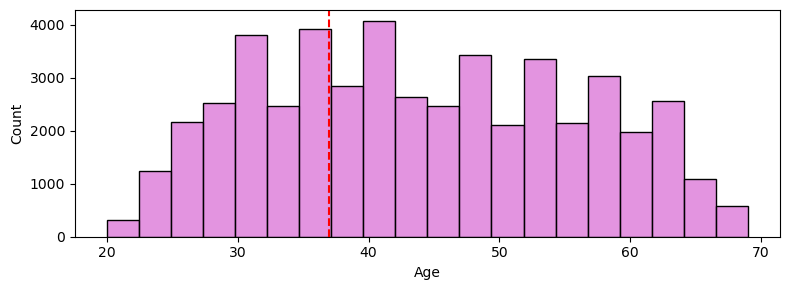

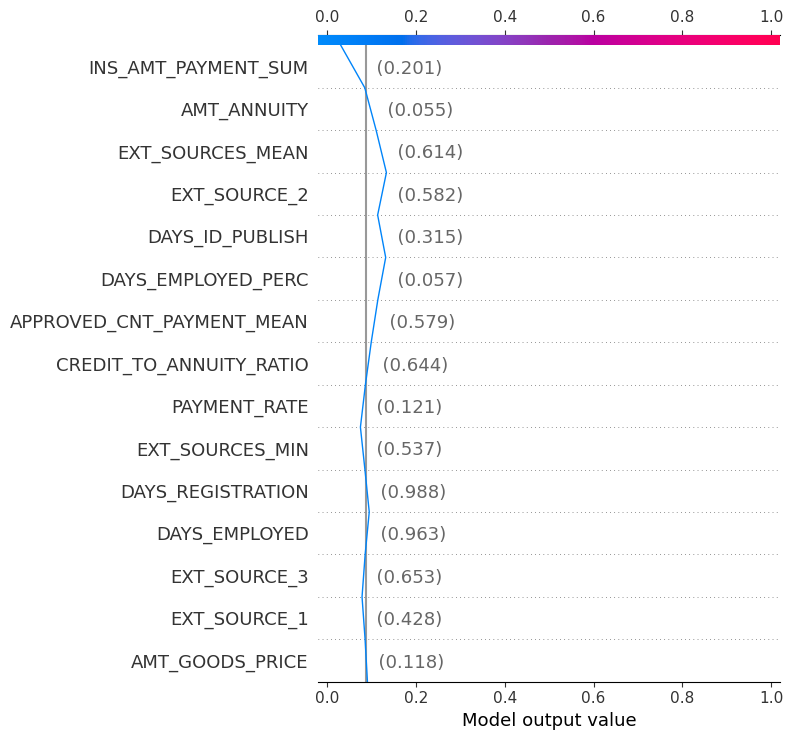

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [119]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
from streamlit_shap import st_shap
import pickle
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

############################
# Configuration de la page #
############################
st.set_page_config(
        page_title='Dashboard Score du Client',
        layout="wide" )

# Définition de quelques styles css
st.markdown(""" 
            <style>
            body {font-family:'Roboto Condensed';}
            h1 {font-family:'Roboto Condensed';}
            h2 {font-family:'Roboto Condensed';}
            p {font-family:'Roboto Condensed'; color:Gray; font-size:1.125rem;}
            .css-18e3th9 {padding-top: 1rem; 
                          padding-right: 1rem; 
                          padding-bottom: 1rem; 
                          padding-left: 1rem;}
            .css-184tjsw p {font-family:'Roboto Condensed'; color:Gray; font-size:1rem;}
            </style> """, 
            unsafe_allow_html=True)

# Centrage de l'image du logo dans la sidebar
col1, col2, col3 = st.columns([1,1,1])
with col1:
    st.sidebar.write("")
with col2:
    image = Image.open('C:\\Users\\LEMuon\\Downloads\\logo.png')
    st.sidebar.image(image, use_column_width="always")
with col3:
    st.sidebar.write("")

########################
# Lecture des fichiers #
########################
data_test_std = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_std_sample.csv', sep=",")
data_test_interprete = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_interprete.csv', sep=",")

#################################################
#     Lecture de l'information d'un client      #
#################################################

liste_clients=list(data_test_std['SK_ID_CURR'].values)

seuil = 0.52

# Selection d'un client
ID_client = st.selectbox("Merci de saisir l'identifiant du client:", (liste_clients))

#st.selectbox("Pour information : Liste des identifiants possibles", liste_clients)
st.text("")
#ID_client = st.text_input("Veuillez entrer l'Identifiant d'un client")
#ID_client = int(ID_client)

#Récupération des informations du client
data_client = data_test_interprete[data_test_interprete.SK_ID_CURR==int(ID_client)]
col1, col2 = st.columns(2)
with col1:
    st.write('__Information de Client__')
    
    st.write('Genre:', data_client['Genre (H/F)'].values[0])
    st.write('Age :', data_client['Age'].values[0], "ans")
    st.write('Date de création de dossier : Il y a ', -data_client['Date de création de dossier'].values[0], "jours")
    st.write('Date enregistrement : Il y a ', -data_client['Date enregistrement'].values[0], "jours")
    st.write('Jours de travail : ', -data_client['Jours de travail'].values[0], "jours")
    st.write('Pourcentage de jours travaillés : ', data_client['Pourcentage de jours travaillés'].values[0],"%")

with col2:
    st.write('__Information de crédit__')
    
    st.write('Prix du bien :', data_client['Prix du bien'].values[0],"$")
    st.write('Annuités :', data_client['Annuités'].values[0],"$")
    st.write('Pourcentage de revevue :', data_client['Pourcentage de revevue'].values[0],"%")
    st.write('Taux de paiement :', data_client['Taux de paiement'].values[0])
    st.write('Ratio de remboursement :', data_client['Ratio de remboursement'].values[0])
    st.write('Ration de crédit de bien :', data_client['Ration de crédit de bien'].values[0])

    #lecture_description_variables()
# Titre 
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Analyse univariée : </h1>
            """, unsafe_allow_html=True)
st.write("")
    
liste_variables = data_test_interprete.drop(['SK_ID_CURR'], axis=1).columns
liste_variables_without_sex = data_test_interprete.drop(['SK_ID_CURR', 'Genre (H/F)'], axis=1).columns

choix = st.selectbox("Merci de choisir une variable : ", (liste_variables))

for var in liste_variables : 
    if var == choix :
        if var == 'Genre (H/F)' : 
            fig, ax = plt.subplots(figsize=(8, 3))
            sns.histplot(data_test_interprete[var], color="orchid", bins=20)
            #ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
            #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
            st.pyplot(fig)
       
        if var != 'Genre (H/F)' :        
            col1, col2 = st.columns(2)
            with col1:
                fig, ax = plt.subplots(figsize=(8, 3))
                sns.histplot(data_test_interprete[choix], color="orchid", bins=20)
                ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
                #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
                st.pyplot(fig)
        
            with col2:
                fig, ax = plt.subplots(figsize=(8, 3))
                sns.boxplot(data=data_test_interprete, x=var, color="blue")
                ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
                #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
                st.pyplot(fig)  
                

#Analyse bivariée
# Titre 
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Analyse bivariée : </h1>
            """, unsafe_allow_html=True)
st.write("")

col1, col2 = st.columns(2)
with col1:
    graph=['Quelle variable voulez-vous voir ?', 'Age', 'Taux de paiement', 'EXT_SOURCE_3', 'Ratio de remboursement',
           'EXT_SOURCES_MEAN', 'Annuités', 'Ration de crédit de bien', 'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN', 
           'EXT_SOURCE_1', 'APPROVED_CNT_PAYMENT_MEAN', 'EXT_SOURCES_MIN', 'INS_AMT_PAYMENT_SUM', 'Prix du bien', 
           'Date de création de dossier', 'EXT_SOURCE_2', 'Pourcentage de revevue', 'Date enregistrement',
           'Pourcentage de jours travaillés', 'Jours de travail']
    choix1 = st.selectbox("Analyses possibles", graph)
#*------------------------------------------------------------------------------------------*

with col2:
    sub_graph=['Par rapport à quelle variable ?', 'Age', 'Taux de paiement', 'EXT_SOURCE_3', 'Ratio de remboursement',
               'EXT_SOURCES_MEAN', 'Annuités', 'Ration de crédit de bien', 'BUREAU_ACTIVE_DEBT_PERCENTAGE_MIN', 
               'EXT_SOURCE_1', 'APPROVED_CNT_PAYMENT_MEAN', 'EXT_SOURCES_MIN', 'INS_AMT_PAYMENT_SUM', 'Genre (H/F)', 
               'Prix du bien', 'Date de création de dossier', 'EXT_SOURCE_2', 'Pourcentage de revevue', 
               'Date enregistrement', 'Pourcentage de jours travaillés', 'Jours de travail']
    sub_choix = st.selectbox("", sub_graph)
    
    for var1 in liste_variables_without_sex :
        if var1 == choix1 :
            st.write("data_client[var1] : ", data_client[var1].values[0])
            
            for var2 in liste_variables :
                if var2 == sub_choix :
                    st.write("data_client[var2] : ", data_client[var2].values[0])
                    st.write(" ")
                    
                    if var2 != 'Genre (H/F)' :            
                        fig, ax = plt.subplots(figsize=(10, 6))
                        plt.scatter(data_test_interprete[var1], data_test_interprete[var2])
                        ax.axvline(data_client[var1].values[0], color="red", linestyle='dashed')
                        ax.axhline(data_client[var2].values[0], color="red", linestyle='dashed')
                        plt.xlabel(var1)
                        plt.ylabel(var2)
                        st.pyplot(fig)
                
                    if var2 == 'Genre (H/F)' :
                        fig2, ax2 = plt.subplots(figsize=(10, 6))
                        sns.histplot(data=data_test_interprete, x=var1, hue="Genre (H/F)")
                        ax2.axvline(data_client[var1].values[0], color="red", linestyle='dashed')
                        st.pyplot(fig2)    
       

    #################################################
    # Lecture du modèle de prédiction et des scores #
    #################################################
# Loading model to compare the results
model_LGBM = pickle.load(open('C:\\Users\\LEMuon\\Downloads\\model.pkl','rb'))
    
# Score client    
X = data_test_std[data_test_std.SK_ID_CURR==int(ID_client)]
X = X.drop(['SK_ID_CURR'], axis=1)
probability_default_payment = model_LGBM.predict_proba(X)[:, 1]
score_value = round(probability_default_payment[0]*100, 2) 
if probability_default_payment >= seuil:
    prediction = "Prêt NON Accordé"
else:
    prediction = "Prêt Accordé" 

# Affichage du Score client 
# Titre 1
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Score du client: </h1>
            """, unsafe_allow_html=True)
st.write("")

col1, col2 = st.columns(2)
with col2:
    original_title = '<p style="font-size: 20px;text-align: center;"> <u>Probabilité d\'être en défaut de paiement : </u> </p>'
    st.markdown(original_title, unsafe_allow_html=True)
    original_title = '<p style="font-family:Courier; color:BROWN; font-size:50px; text-align: center;">{}%</p>'.format((probability_default_payment[0]*100).round(2))
    st.markdown(original_title, unsafe_allow_html=True)

    original_title = '<p style="font-size: 20px;text-align: center;"> <u>Conclusion : </u> </p>'
    st.markdown(original_title, unsafe_allow_html=True)

    if prediction == "Prêt Accordé":
        original_title = '<p style="font-family:Courier; color:GREEN; font-size:70px; text-align: center;">{}</p>'.format(prediction)
        st.markdown(original_title, unsafe_allow_html=True)
    else :
        original_title = '<p style="font-family:Courier; color:red; font-size:70px; text-align: center;">{}</p>'.format(prediction)
        st.markdown(original_title, unsafe_allow_html=True)    
    
# Impression du graphique jauge
with col1:
    fig = go.Figure(go.Indicator(
                        domain = {'x': [0, 1], 'y': [0, 1]},
                        value = float(score_value),
                        mode = "gauge+number+delta",
                        title = {'text': "Score du client", 'font': {'size': 24}},
                        delta = {'reference': seuil*100, 'increasing': {'color': "#3b203e"}},
                        gauge = {'axis': {'range': [None, 100],
                                'tickwidth': 3,
                                'tickcolor': 'darkblue'},
                                'bar': {'color': 'white', 'thickness' : 0.3},
                                'bgcolor': 'white',
                                'borderwidth': 1,
                                'bordercolor': 'gray',
                                'steps': [{'range': [0, 20], 'color': '#e8af92'},
                                          {'range': [20, 40], 'color': '#db6e59'},
                                          {'range': [40, 60], 'color': '#b43058'},
                                          {'range': [60, 80], 'color': '#772b58'},
                                          {'range': [80, 100], 'color': '#3b203e'}],
                                'threshold': {'line': {'color': 'white', 'width': 8},
                                              'thickness': 0.8,
                                              'value': seuil*100 }}))

    fig.update_layout(paper_bgcolor='white',
                      height=400, width=500,
                      font={'color': '#772b58', 'family': 'Roboto Condensed'},
                      margin=dict(l=30, r=30, b=5, t=5))
    st.plotly_chart(fig, use_container_width=True)    
    
    
################################
# Explication de la prédiction #
################################
    # Titre 2
st.markdown("""
                <h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Explication du calcul:</h1>
                """, 
                unsafe_allow_html=True)
st.write("")
    

    # Calcul des valeurs Shap
explainer_shap = shap.TreeExplainer(model_LGBM)
shap_values = explainer_shap.shap_values(data_test_std.drop(labels="SK_ID_CURR", axis=1))


    # récupération de l'index correspondant à l'identifiant du client
    #idx = int(data_test[data_test['SK_ID_CURR']==ID_client].index[0])
idx = int(data_test_std.index[data_test_std['SK_ID_CURR']==ID_client].tolist()[0])
    
    # Graphique force_plot
st.write("Le graphique suivant permet de voir où se place la prédiction (f(x)) par rapport à la `base value`.") 
st.write("Nous observons également les variables qui augmentent la probabilité du client d'être \
            en défaut de paiement (en rouge) et celles qui la diminuent (en bleu), ainsi que l’amplitude de cet impact.")    


pd.set_option('display.max_colwidth', None)

    #st.dataframe(lecture_description_variables())

st_shap(shap.force_plot(explainer_shap.expected_value[1], 
                            shap_values[1][idx,:], 
                            data_test_std.drop(labels="SK_ID_CURR", axis=1).iloc[idx,:], 
                            link='logit',
                            figsize=(20, 8),
                            ordering_keys=True,
                            text_rotation=0,
                            contribution_threshold=0.05))
    # Graphique decision_plot
st.write("Le graphique ci-dessous est une autre manière de comprendre la prédiction. ")
st.write("Seules les 15 variables explicatives les plus importantes sont affichées.")
st_shap(shap.decision_plot(explainer_shap.expected_value[1], 
                            shap_values[1][idx,:], 
                            data_test_std.drop(labels="SK_ID_CURR", axis=1).iloc[idx,:], 
                            feature_names=data_test_std.drop(labels="SK_ID_CURR", axis=1).columns.to_list(),
                            feature_order='importance',
                            feature_display_range=slice(None, -16, -1), # affichage des 15 variables les + importantes
                            link='logit'))
    

    


# API

In [ ]:
# Import all packages and libraries
import pandas as pd
import numpy as np
from flask import Flask, render_template,jsonify, request
import pickle

app= Flask(__name__, template_folder='templates')

#app.config.from_object('config')

#clients = [
#   {'id': 100001},
#   {'id': 100005},
#   {'id': 100013}
#]
clients = data_test['SK_ID_CURR'].tolist()

@app.route('/', methods=['GET'])
def home():
    print('Step 1')
    
    return render_template('dashboard.html')#C:\\Users\\LEMuon\\Downloads\\
    #return '''<h1>Annuaire Internet</h1>
#<p>Ce site est le prototype d’une API mettant à disposition des données sur les employés d’une entreprise.</p>'''


@app.route('/predict/all', methods=['GET'])
def api_all():
    print("Site 2")
    return jsonify(clients)


@app.route('/predict', methods = ['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    print('Step 3')
    
    all_id_client = list(ids.unique())    
    
    seuil = 0.325
    print('Step 4')
    #ID = request.form['id_client']
    if 'id' in request.args:
        ID = int(request.args['id'])
    #else:
    #    return "Erreur: Pas d’identifiant fourni. Veuillez spécifier un id."
    #ID = int(ID)
    print(ID)
    print('Step 5')
    if ID not in all_id_client:
        prediction="Ce client n'est pas répertorié"
    else :
        X = data_test[data_test['SK_ID_CURR'] == ID]
        display(X)
        X = X.drop(['SK_ID_CURR'], axis=1)
        print('Step 6')
        #data = df[df.index == comment]
        probability_default_payment = model.predict_proba(X)[:, 1]
        print(probability_default_payment)
        print('Step 7')
        if probability_default_payment >= seuil:
            prediction = "Prêt NON Accordé, risque de défaut"
        else:
            prediction = "Prêt Accordé"
        print(prediction)
        print('Step 8')
    #return render_template('dashboard.html', prediction_text=prediction)
    return jsonify(prediction)

# Define endpoint for flask
app.add_url_rule('/predict', 'predict', predict)

@app.route('/prediction_complete')
def pred_model():
    X = X.drop(['TARGET', 'SK_ID_CURR'], axis=1)
    seuil = 0.625
    y_pred = model.predict_proba(Xtot)[:,1]
    y_seuil = y_pred >= seuil
    y_seuil = np.array(y_seuil> 0)*1
    df_pred = df.copy()
    df_pred['Proba']=y_pred
    df_pred['PREDICTION']=y_seuil

    test_prediction = df_pred.to_json(orient = 'index')
    #with open("./credit_score_app/static/data/pred.json", "w") as outfile:
        #outfile.write(test_prediction)
    return  test_prediction

# Run app.
if __name__ == '__main__':
    app.run()

print('FINIT')

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
from streamlit_shap import st_shap
import pickle
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

############################
# Configuration de la page #
############################
st.set_page_config(
        page_title='Dashboard Score du Client',
        layout="wide" )

# Définition de quelques styles css
st.markdown(""" 
            <style>
            body {font-family:'Roboto Condensed';}
            h1 {font-family:'Roboto Condensed';}
            h2 {font-family:'Roboto Condensed';}
            p {font-family:'Roboto Condensed'; color:Gray; font-size:1.125rem;}
            .css-18e3th9 {padding-top: 1rem; 
                          padding-right: 1rem; 
                          padding-bottom: 1rem; 
                          padding-left: 1rem;}
            .css-184tjsw p {font-family:'Roboto Condensed'; color:Gray; font-size:1rem;}
            </style> """, 
            unsafe_allow_html=True)

# Centrage de l'image du logo dans la sidebar
col1, col2, col3 = st.columns([1,1,1])
with col1:
    st.sidebar.write("")
with col2:
    image = Image.open('C:\\Users\\LEMuon\\Downloads\\logo.png')
    st.sidebar.image(image, use_column_width="always")
with col3:
    st.sidebar.write("")

########################
# Lecture des fichiers #
########################
data_test_std = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_20features_importance_std_sample.csv', sep=",")
data_test_interprete = pd.read_csv('C:\\Users\\LEMuon\\Downloads\\P7\\P7_data_test_interprete.csv', sep=",")

#################################################
#     Lecture de l'information d'un client      #
#################################################

liste_clients=list(data_test_std['SK_ID_CURR'].values)

seuil = 0.52

# Selection d'un client
ID_client = st.selectbox("Merci de saisir l'identifiant du client:", (liste_clients))

#st.selectbox("Pour information : Liste des identifiants possibles", liste_clients)
st.text("")
#ID_client = st.text_input("Veuillez entrer l'Identifiant d'un client")
#ID_client = int(ID_client)

#Récupération des informations du client
data_client = data_test_interprete[data_test_interprete.SK_ID_CURR==int(ID_client)]
col1, col2 = st.columns(2)
with col1:
    st.write('__Information de Client__')
    
    st.write('Genre:', data_client['Genre (H/F)'].values[0])
    st.write('Age :', data_client['Age'].values[0], "ans")
    st.write('Date de création de dossier : Il y a ', -data_client['Date de création de dossier'].values[0], "jours")
    st.write('Date enregistrement : Il y a ', -data_client['Date enregistrement'].values[0], "jours")
    st.write('Jours de travail : ', -data_client['Jours de travail'].values[0], "jours")
    st.write('Pourcentage de jours travaillés : ', data_client['Pourcentage de jours travaillés'].values[0],"%")

with col2:
    st.write('__Information de crédit__')
    
    st.write('Prix du bien :', data_client['Prix du bien'].values[0],"$")
    st.write('Annuités :', data_client['Annuités'].values[0],"$")
    st.write('Pourcentage de revevue :', data_client['Pourcentage de revevue'].values[0],"%")
    st.write('Taux de paiement :', data_client['Taux de paiement'].values[0])
    st.write('Ratio de remboursement :', data_client['Ratio de remboursement'].values[0])
    st.write('Ration de crédit de bien :', data_client['Ration de crédit de bien'].values[0])

    #lecture_description_variables()
# Titre 
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Analyse univariée : </h1>
            """, unsafe_allow_html=True)
st.write("")
    
liste_variables = data_test_interprete.drop(['SK_ID_CURR'], axis=1).columns
liste_variables_without_sex = data_test_interprete.drop(['SK_ID_CURR', 'Genre (H/F)'], axis=1).columns

choix = st.selectbox("Merci de choisir une variable : ", (liste_variables))

for var in liste_variables : 
    if var == choix :
        if var == 'Genre (H/F)' : 
            fig, ax = plt.subplots(figsize=(8, 3))
            sns.histplot(data_test_interprete[var], color="orchid", bins=20)
            #ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
            #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
            st.pyplot(fig)
       
        if var != 'Genre (H/F)' :        
            col1, col2 = st.columns(2)
            with col1:
                fig, ax = plt.subplots(figsize=(8, 3))
                sns.histplot(data_test_interprete[choix], color="orchid", bins=20)
                ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
                #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
                st.pyplot(fig)
        
            with col2:
                fig, ax = plt.subplots(figsize=(8, 3))
                sns.boxplot(data=data_test_interprete, x=var, color="blue")
                ax.axvline(data_client[var].values[0], color="red", linestyle='dashed')
                #ax.set(title=var)#, xlabel='Revenu (USD)', ylabel='')
                st.pyplot(fig)  
                

#Analyse bivariée
# Titre 
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Analyse bivariée : </h1>
            """, unsafe_allow_html=True)
st.write("")

options = st.multiselect('What are your favorite colors', [liste_variables], [liste_variables])

st.write('You selected:', options)
st.write('Première variable : ', options[0])
st.write('Deuxième variable : ', options[1])


                    
                   

In [ ]:
 for var1 in liste_variables_without_sex :
        #if var1 == choix1 :
    st.write("data_client[var1] : ", data_client[var1].values[0])
            
    for var2 in liste_variables :
        #if var2 == sub_choix :
        st.write("data_client[var2] : ", data_client[var2].values[0])
        st.write(" ")
    
    if var2 != 'Genre (H/F)' :            
                        fig, ax = plt.subplots(figsize=(10, 6))
                        plt.scatter(data_test_interprete[var1], data_test_interprete[var2])
                        ax.axvline(data_client[var1].values[0], color="red", linestyle='dashed')
                        ax.axhline(data_client[var2].values[0], color="red", linestyle='dashed')
                        plt.xlabel(var1)
                        plt.ylabel(var2)
                        st.pyplot(fig)
                
                    if var2 == 'Genre (H/F)' :
                        fig2, ax2 = plt.subplots(figsize=(10, 6))
                        sns.histplot(data=data_test_interprete, x=var1, hue="Genre (H/F)")
                        ax2.axvline(data_client[var1].values[0], color="red", linestyle='dashed')
                        st.pyplot(fig2)    
       

    #################################################
    # Lecture du modèle de prédiction et des scores #
    #################################################
# Loading model to compare the results
model_LGBM = pickle.load(open('C:\\Users\\LEMuon\\Downloads\\model.pkl','rb'))
    
# Score client    
X = data_test_std[data_test_std.SK_ID_CURR==int(ID_client)]
X = X.drop(['SK_ID_CURR'], axis=1)
probability_default_payment = model_LGBM.predict_proba(X)[:, 1]
score_value = round(probability_default_payment[0]*100, 2) 
if probability_default_payment >= seuil:
    prediction = "Prêt NON Accordé"
else:
    prediction = "Prêt Accordé" 

# Affichage du Score client 
# Titre 1
st.markdown("""<h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Score du client: </h1>
            """, unsafe_allow_html=True)
st.write("")

col1, col2 = st.columns(2)
with col2:
    original_title = '<p style="font-size: 20px;text-align: center;"> <u>Probabilité d\'être en défaut de paiement : </u> </p>'
    st.markdown(original_title, unsafe_allow_html=True)
    original_title = '<p style="font-family:Courier; color:BROWN; font-size:50px; text-align: center;">{}%</p>'.format((probability_default_payment[0]*100).round(2))
    st.markdown(original_title, unsafe_allow_html=True)

    original_title = '<p style="font-size: 20px;text-align: center;"> <u>Conclusion : </u> </p>'
    st.markdown(original_title, unsafe_allow_html=True)

    if prediction == "Prêt Accordé":
        original_title = '<p style="font-family:Courier; color:GREEN; font-size:70px; text-align: center;">{}</p>'.format(prediction)
        st.markdown(original_title, unsafe_allow_html=True)
    else :
        original_title = '<p style="font-family:Courier; color:red; font-size:70px; text-align: center;">{}</p>'.format(prediction)
        st.markdown(original_title, unsafe_allow_html=True)    
    
# Impression du graphique jauge
with col1:
    fig = go.Figure(go.Indicator(
                        domain = {'x': [0, 1], 'y': [0, 1]},
                        value = float(score_value),
                        mode = "gauge+number+delta",
                        title = {'text': "Score du client", 'font': {'size': 24}},
                        delta = {'reference': seuil*100, 'increasing': {'color': "#3b203e"}},
                        gauge = {'axis': {'range': [None, 100],
                                'tickwidth': 3,
                                'tickcolor': 'darkblue'},
                                'bar': {'color': 'white', 'thickness' : 0.3},
                                'bgcolor': 'white',
                                'borderwidth': 1,
                                'bordercolor': 'gray',
                                'steps': [{'range': [0, 20], 'color': '#e8af92'},
                                          {'range': [20, 40], 'color': '#db6e59'},
                                          {'range': [40, 60], 'color': '#b43058'},
                                          {'range': [60, 80], 'color': '#772b58'},
                                          {'range': [80, 100], 'color': '#3b203e'}],
                                'threshold': {'line': {'color': 'white', 'width': 8},
                                              'thickness': 0.8,
                                              'value': seuil*100 }}))

    fig.update_layout(paper_bgcolor='white',
                      height=400, width=500,
                      font={'color': '#772b58', 'family': 'Roboto Condensed'},
                      margin=dict(l=30, r=30, b=5, t=5))
    st.plotly_chart(fig, use_container_width=True)    
    
    
################################
# Explication de la prédiction #
################################
    # Titre 2
st.markdown("""
                <h1 style="color:#772b58;font-size:2.3em;font-style:italic;font-weight:700;margin:0px;">
                Explication du calcul:</h1>
                """, 
                unsafe_allow_html=True)
st.write("")
    

    # Calcul des valeurs Shap
explainer_shap = shap.TreeExplainer(model_LGBM)
shap_values = explainer_shap.shap_values(data_test_std.drop(labels="SK_ID_CURR", axis=1))


    # récupération de l'index correspondant à l'identifiant du client
    #idx = int(data_test[data_test_std['SK_ID_CURR']==ID_client].index[0])
idx = int(data_test_std.index[data_test_std['SK_ID_CURR']==ID_client].tolist()[0])
    
    # Graphique force_plot
st.write("Le graphique suivant permet de voir où se place la prédiction (f(x)) par rapport à la `base value`.") 
st.write("Nous observons également les variables qui augmentent la probabilité du client d'être \
            en défaut de paiement (en rouge) et celles qui la diminuent (en bleu), ainsi que l’amplitude de cet impact.")    


pd.set_option('display.max_colwidth', None)

    #st.dataframe(lecture_description_variables())

st_shap(shap.force_plot(explainer_shap.expected_value[1], 
                            shap_values[1][idx,:], 
                            data_test_std.drop(labels="SK_ID_CURR", axis=1).iloc[idx,:], 
                            link='logit',
                            figsize=(20, 8),
                            ordering_keys=True,
                            text_rotation=0,
                            contribution_threshold=0.05))
    # Graphique decision_plot
st.write("Le graphique ci-dessous est une autre manière de comprendre la prédiction. ")

st_shap(shap.decision_plot(explainer_shap.expected_value[1], 
                            shap_values[1][idx,:], 
                            data_test_std.drop(labels="SK_ID_CURR", axis=1).iloc[idx,:], 
                            feature_names=data_test_std.drop(labels="SK_ID_CURR", axis=1).columns.to_list(),
                            feature_order='importance',
                            feature_display_range=slice(None, -21, -1), 
                            link='logit'))
    

    
